## Regression Tree

Create a regression tree to predict the barrels per day (`bpd`) produced by some given drilling site, given `porosity`, `gamma`, `density` and `sonic`

You will have access to a list of training examples  in the `RegressionTree`'s `root` node, specifically in `RegressionTree.root.examples`. Each example is a dictionary with feature keys mapping to their respective values and with a `bpd` key mapping to the example's label

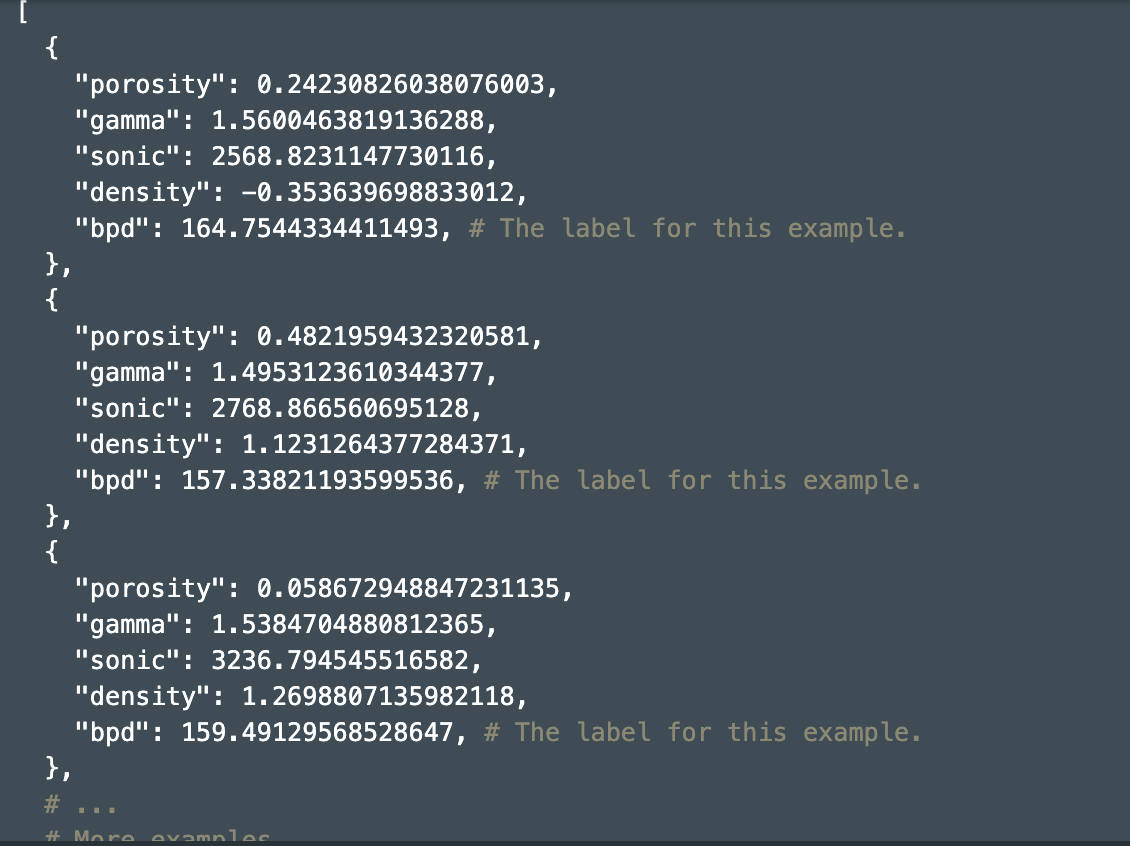

1. Mean Squared Error as splitting criteria
2. You should not evaluate `bpd` as a feature to split on
3. You should not use hyperparameters like max depth
4. No need to handle missing or to scale them

In [1]:
"""
Pesudo Code and Comments
1. MSE = sum(n) (l_i - l_avg) ^ 2 / n -> To evaluate the split at across split
    a. Split points - 
    b. Recursively to have one only point in each leaf
    c. Prediction - Average in the leaf node
2. For Training:
    a. for each feature
        b. for each split_point_value
            c. best_split = min MSE(feature, split_point_value)
    b. split_examples_left() -> for all the examples sent to this node
    c. recurse()
    d. split_examples_right()
    e. recurse()
3. Prediction :
    a. tree_node = root
    b. while tree_node has children:
        c. if example[root.split_point['feature']] <= root.split_point['value']:
            d. tree_node = root.left
        else:
            e. tree_node = root.right
    c. prediction = sum(tree_node.examples['label']) / len(tree_node.examples['label'])

"""

class TreeNode:
    def __init__(self, examples):
        self.examples = examples
        self.left = None
        self.right = None
        self.split_point = None

    def split(self):
        # Write your code here.pass
        if len(self.examples) == 1:
            return
        
        best_split_point = {
            "feature": None,
            "value": None,
            "mse":float("inf"),
            "split_index": None
        }

        for feature in self.examples[0].keys():
            if feature == "bpd":
                continue

            self.examples.sort(key=lambda example: example[feature])
            
            for i, _ in enumerate(self.examples[:-1]):
                split_point_value = (self.examples[i][feature] + self.examples[i+1][feature]) / 2
                mse, split_index = self.get_split_point_mse(feature, split_point_value)
                if best_split_point["mse"] > mse:
                    best_split_point = {
                        "feature": feature,
                        "value": split_point_value,
                        "mse": mse,
                        "split_index": split_index
                    }
        self.split_point = best_split_point

        self.examples.sort(key=lambda example: example[self.split_point["feature"]])
        
        self.left = TreeNode(self.examples[: self.split_point["split_index"]])
        self.left.split()

        self.right = TreeNode(self.examples[self.split_point["split_index"] :])
        self.right.split()
    
    def get_split_point_mse(self, feature, split_point_value):
        left_split_labels = [example["bpd"] for example in self.examples if example[feature] <= split_point_value]
        right_split_labels = [example["bpd"] for example in self.examples if example[feature] > split_point_value]

        if not len(left_split_labels) or not (len(right_split_labels)):
            return None, None

        left_split_mse = get_mse(left_split_labels)
        right_split_mse = get_mse(right_split_labels)
        num_samples = len(left_split_labels) + len(right_split_labels)

        mse = ((len(left_split_labels) * left_split_mse) + (len(right_split_labels) * right_split_mse)) / num_samples
        split_index = len(left_split_labels)

        return mse, split_index

def get_mse(values):
    average = get_average(values)
    return sum([(value - average) ** 2 for value in values]) / len(values)

def get_average(values):
    return sum(values) / len(values)
                

class RegressionTree:
    def __init__(self, examples):
        # Don't change the following two lines of code.
        self.root = TreeNode(examples)
        self.train()

    def train(self):
        # Don't edit this line.
        self.root.split()

    def predict(self, example):
        # Write your code here.
        node = self.root

        while node.left and node.right:
            if example[node.split_point["feature"]] <= node.split_point["value"]:
                node = node.left
            else:
                node = node.right

        leaf_labels  = [leaf_example["bpd"] for leaf_example in node.examples]
        return sum(leaf_labels) / len(leaf_labels)
